### 대중교통 데이터 분석
- 티머니 홈페이지 > 대중교통 통계자료 > 지하철 유무임별 이용현황 ( , 제거)

In [ ]:
import csv
f = open('subwayfee.csv')
data = csv.reader(f)
next(data)

for row in data:
    for i in range(4, 8):
        row[i] = int(row[i])
    print(row)

#### 유임 승차 비율이 가장 높은 역?
- 유임 승차 4번째 index
- 비율 = 유임승차인원/무임승차인원

In [1]:
import csv
f = open('subwayfee.csv')
data = csv.reader(f)
next(data)

maxi = 0
rate = 0
for row in data:
    if int(row[6]) != 0:
        rate = int(row[4]) / int(row[6])
        if rate > maxi:
            maxi = rate
            print(row, round(rate, 2))
        

['2021년 2월', '1호선', '1', '서울역', '759952 ', '717577 ', '126806 ', '118305 '] 5.99
['2021년 2월', '1호선', '2', '시청', '371198 ', '370551 ', '47249 ', '44775 '] 7.86
['2021년 2월', '2호선', '11', '시청', '430547 ', '407926 ', '34311 ', '30492 '] 12.55
['2021년 2월', '2호선', '19', '한양대', '126549 ', '131862 ', '7718 ', '8078 '] 16.4
['2021년 2월', '2호선', '49', '홍대입구', '1180000 ', '1232530 ', '65353 ', '63071 '] 18.06
['2021년 2월', '경부선', '121', '서울역', '114443 ', '35108 ', '5768 ', '1413 '] 19.84


In [2]:
# rate = 유임승차 / 유임+무임 승차
import csv
f = open('subwayfee.csv')
data = csv.reader(f)
next(data)

maxi = 0
rate = 0
for row in data:
    if int(row[6]) != 0 and (int(row[4])+int(row[6])) > 100000:
        rate = int(row[4]) / (int(row[6]) + int(row[4]))
        if rate > maxi:
            maxi = rate
            print(row, round(rate, 2))

['2021년 2월', '1호선', '1', '서울역', '759952 ', '717577 ', '126806 ', '118305 '] 0.86
['2021년 2월', '1호선', '2', '시청', '371198 ', '370551 ', '47249 ', '44775 '] 0.89
['2021년 2월', '2호선', '11', '시청', '430547 ', '407926 ', '34311 ', '30492 '] 0.93
['2021년 2월', '2호선', '19', '한양대', '126549 ', '131862 ', '7718 ', '8078 '] 0.94
['2021년 2월', '2호선', '49', '홍대입구', '1180000 ', '1232530 ', '65353 ', '63071 '] 0.95
['2021년 2월', '경부선', '121', '서울역', '114443 ', '35108 ', '5768 ', '1413 '] 0.95


In [3]:
import csv
f = open('subwayfee.csv')
data = csv.reader(f)
next(data)

maxi = 0
rate = 0
maxi_station = ''

for row in data:
    for i in range(4, 8):
        row[i] = int(row[i])
    if row[6] != 0 and (row[4] + row[6]) > 100000:
        rate = row[4] / (row[4] + row[6])
        if rate > maxi:
            maxi = rate
            maxi_station = row[3] + ' ' + row[1]
        
print(maxi_station, round(maxi*100, 2))

서울역 경부선 95.2


### 유무임 승하차 인원이 가장 많은 역 찾기

In [4]:
import csv
f = open('subwayfee.csv')
data = csv.reader(f)
next(data)

maxi = [0]*4
maxi_station = ['']*4
label = ['유임승차', '유임하차', '무임승차', '무임하차']

for row in data:
    for i in range(4, 8):
        row[i] = int(row[i])
        if row[i] > maxi[i-4]:
            maxi[i-4] = row[i]
            maxi_station[i-4] = row[3] +  row[1]

for i in range(4):
    print(label[i] + ' : ' + maxi_station[i], maxi[i])
        

유임승차 : 강남2호선 1711729
유임하차 : 강남2호선 1676555
무임승차 : 청량리(서울시립대입구)1호선 210004
무임하차 : 제기동1호선 223286


### 모든 역의 유무임 승하차 비율 : 파이차트

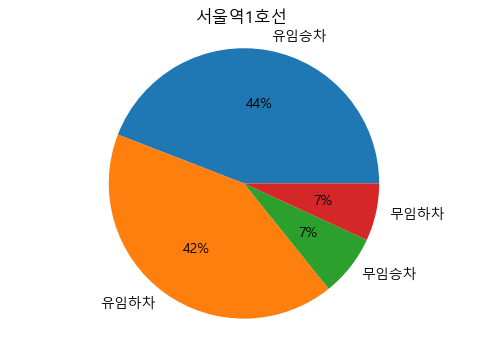

In [8]:
import csv
import matplotlib.pyplot as plt

f = open('subwayfee.csv')
data = csv.reader(f)
next(data)

label = ['유임승차', '유임하차', '무임승차', '무임하차']
plt.rc('font', family='Malgun Gothic')

for row in data:
    for i in range(4, 8):
        row[i] = int(row[i])
    
    plt.figure(dpi=100)
    plt.title(row[3] + row[1])
    plt.pie(row[4:8], labels=label, autopct='%1.f%%')
    plt.axis('equal')
    plt.show()
    break

In [ ]:
# 작업 중인 폴더에 이미지 파일 저장
plt.saveflg(row[3] + row[1] + '.png')